In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
def normal_pdf(x, mean, var):
    return np.exp(-(x - mean) ** 2 / (2 * var))

In [3]:
# generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100

xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# generate the blobs.
# the range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights = (
    np.outer(gauss_y_high, gauss_x_high)
    - np.outer(gauss_y_low, gauss_x_low)
)

# also create a grey background into which the pixels will fade
grays = np.full((*weights.shape, 3), 70, dtype=np.uint8)

# plot these blobs using ``imshow`` without transparency
vmax = np.abs(weights).max()
imshow_kwargs = {
    "vmax": vmax,
    "vmin": -vmax,
    "cmap": "RdYlGn",
    "extent": (xmin, xmax, ymin, ymax),
}

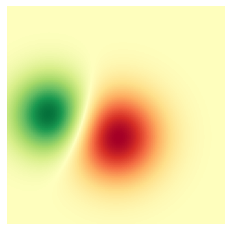

In [4]:
fig, ax = plt.subplots()
ax.imshow(grays)
ax.imshow(weights, **imshow_kwargs)
ax.set_axis_off()
plt.show()